In [290]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from pathlib import Path

In [291]:
result_dir = Path("result/ra1000")
security_path = result_dir / "TSMC.json"
agent_path = result_dir / "agent.json"
tsmc = pd.read_json(security_path)

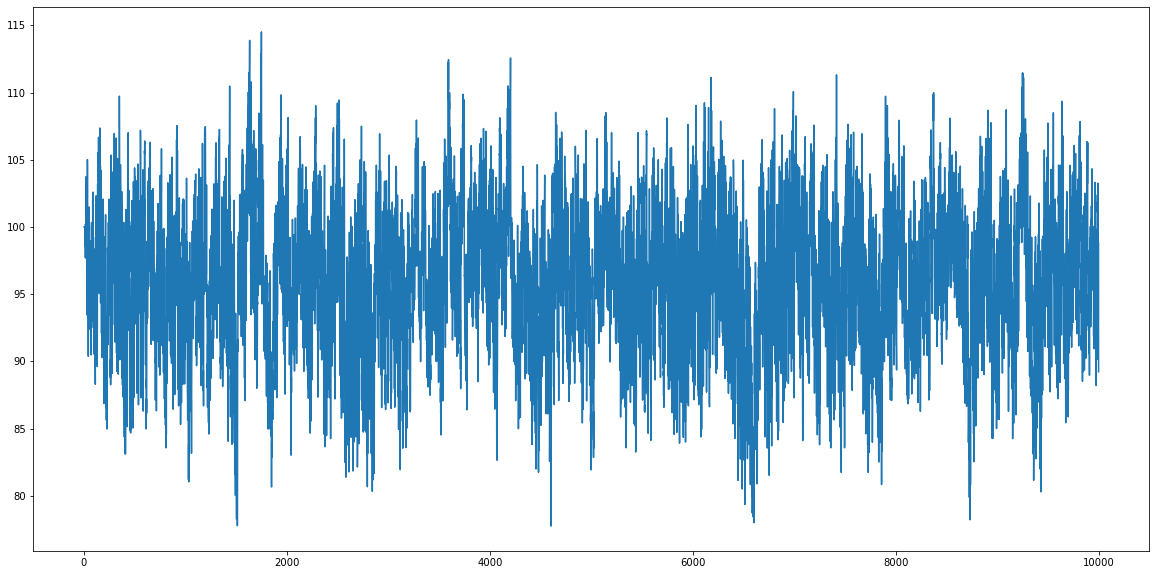

In [292]:
tsmc['average'].plot(figsize = (20, 10))

In [293]:
agent = pd.read_json(agent_path)

In [294]:
agent.columns

Index(['ra_1_CASH', 'ra_1_TSMC', 'ra_1_WEALTH', 'tr_1_CASH', 'tr_1_TSMC',
       'tr_1_WEALTH', 'mr_1_CASH', 'mr_1_TSMC', 'mr_1_WEALTH', 'fu_1_CASH',
       'fu_1_TSMC', 'fu_1_WEALTH'],
      dtype='object')

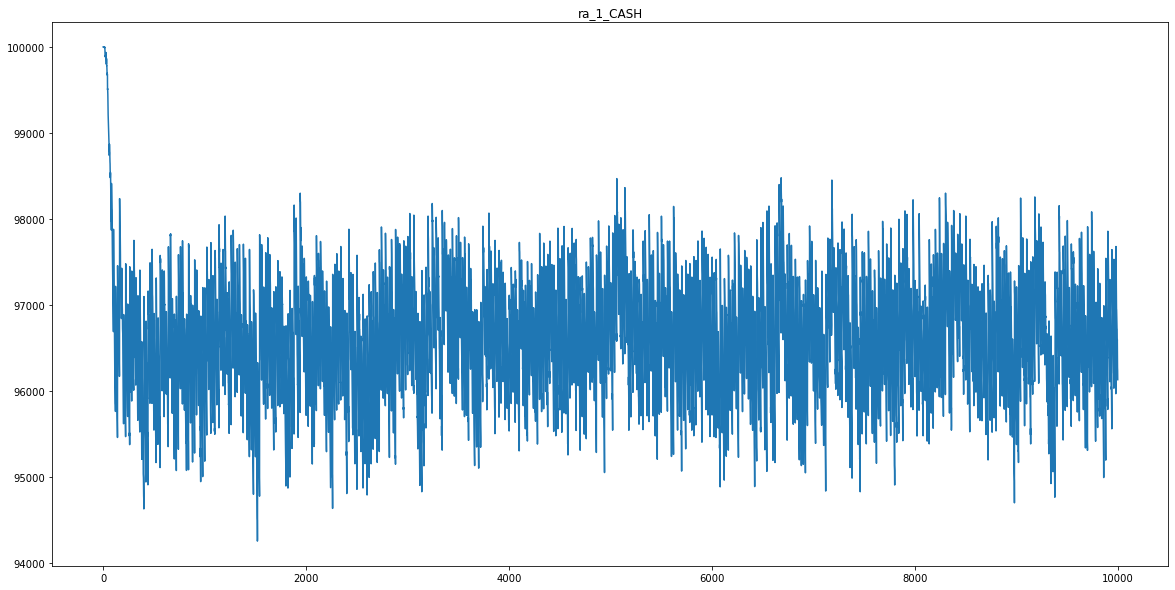

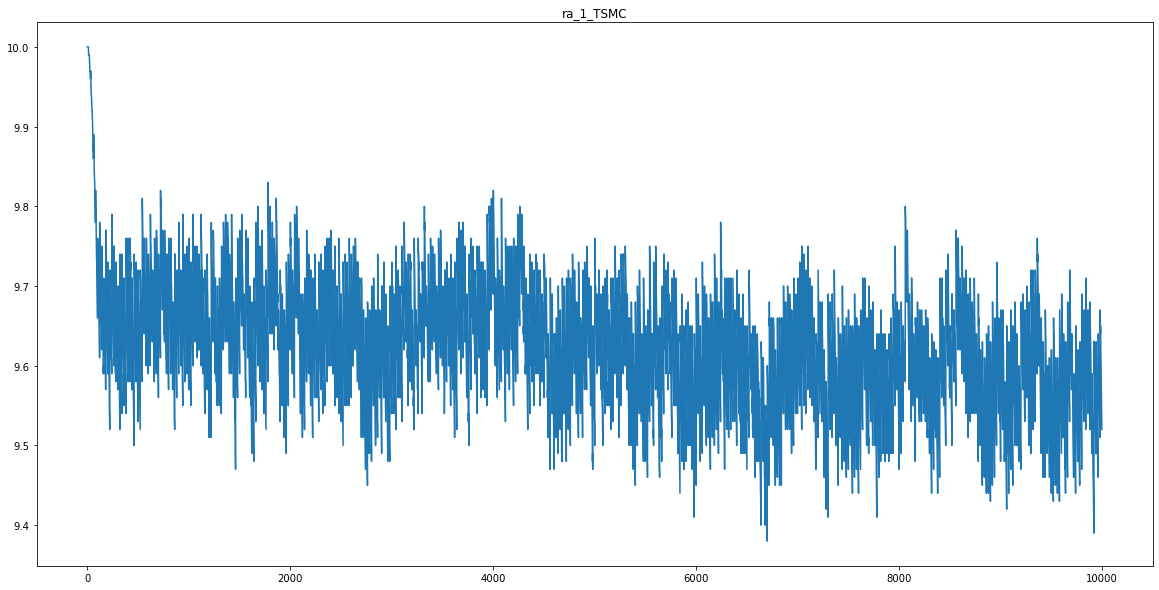

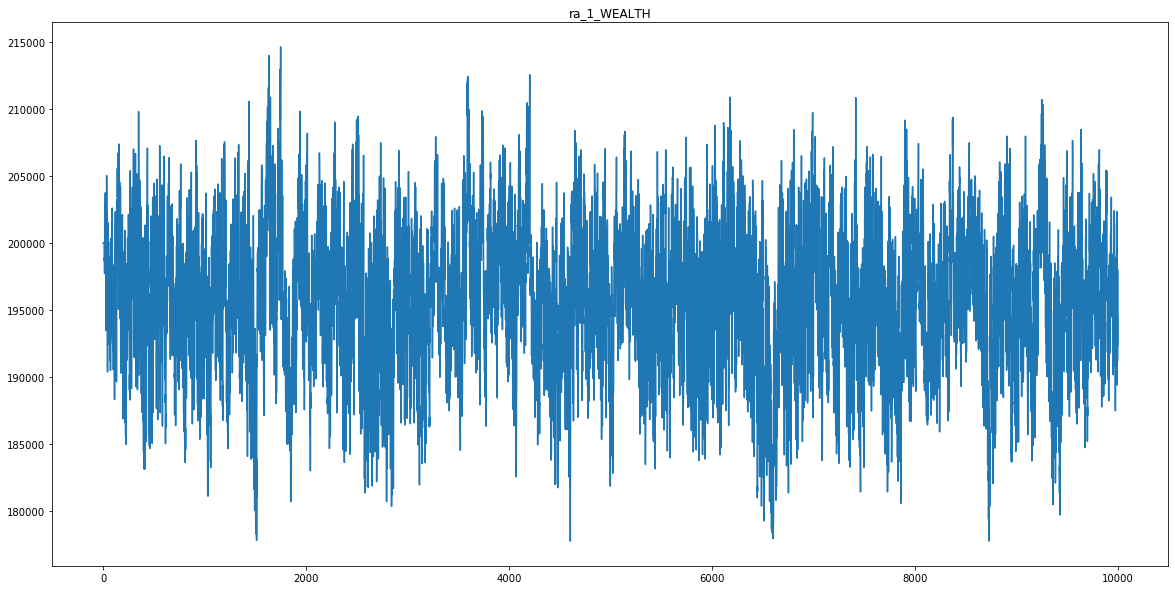

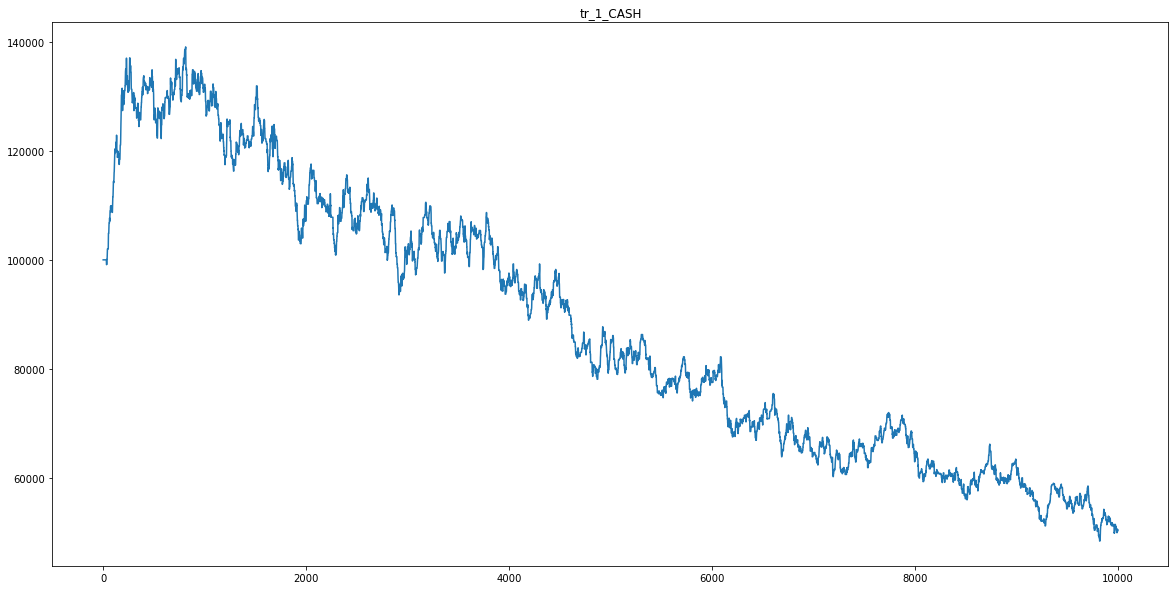

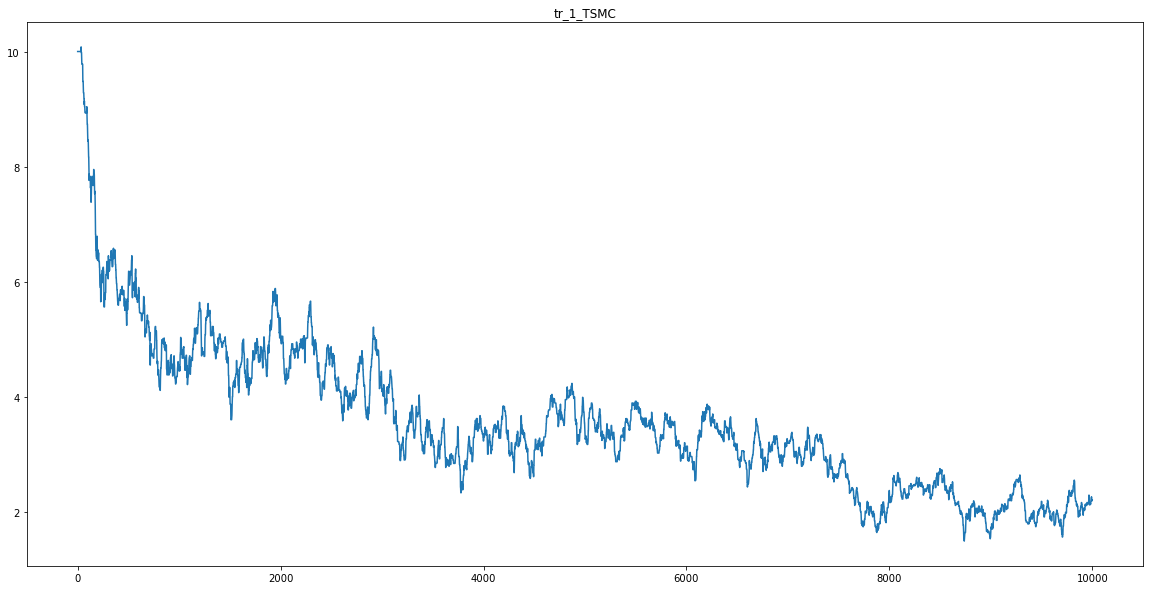

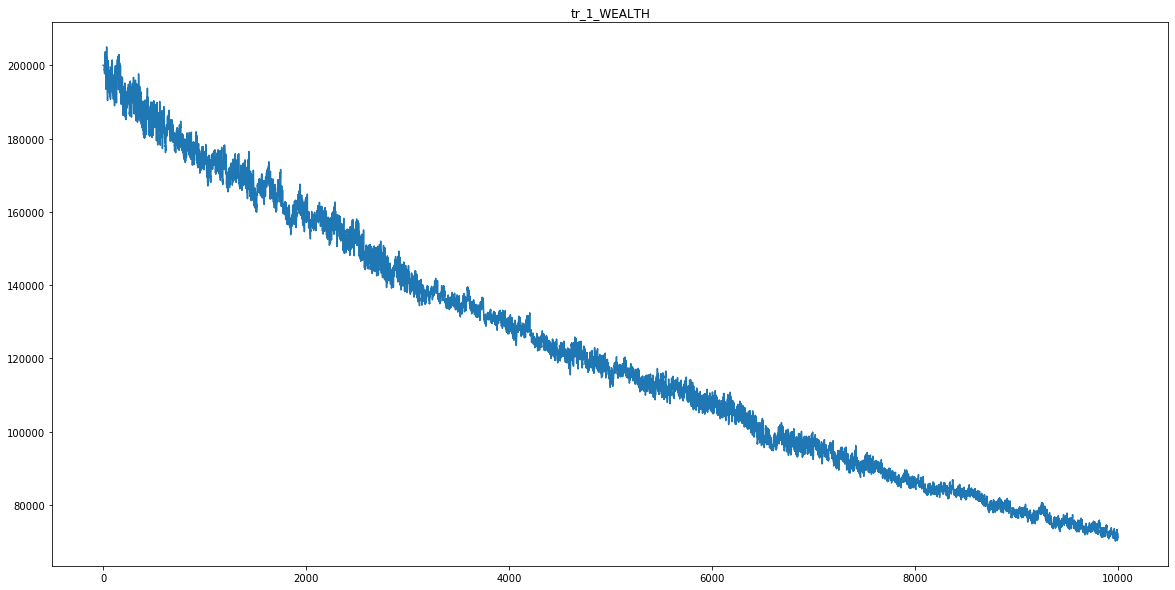

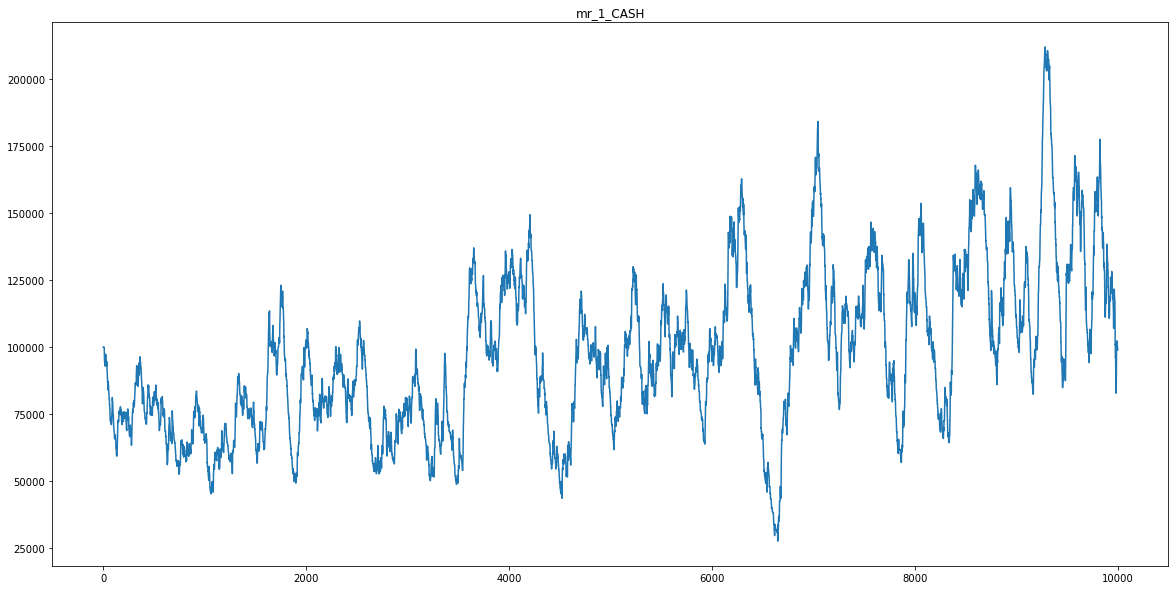

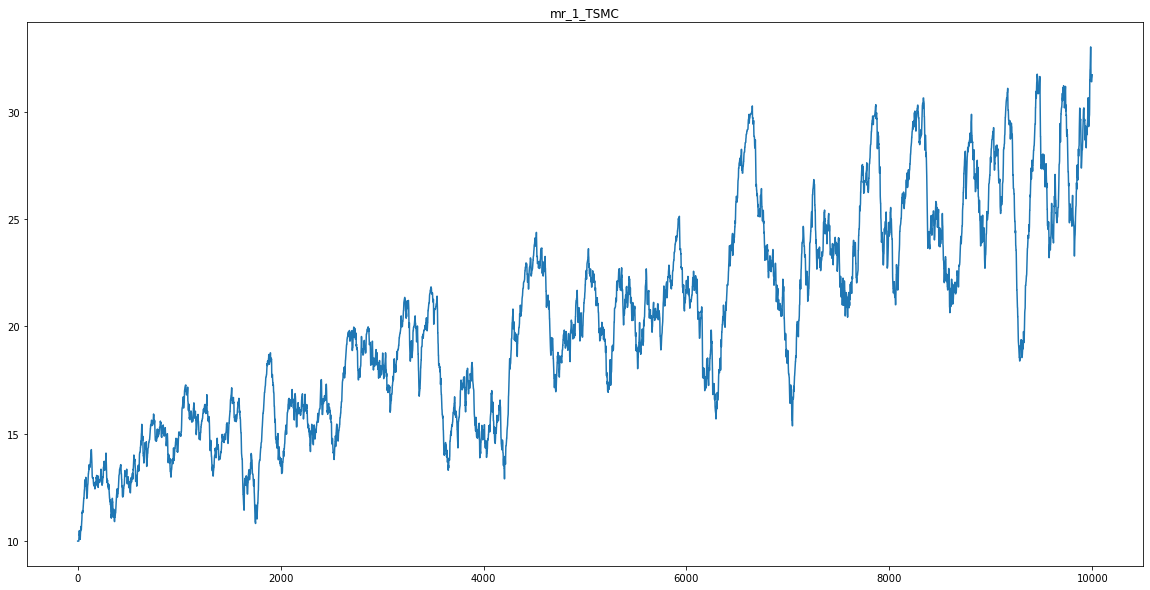

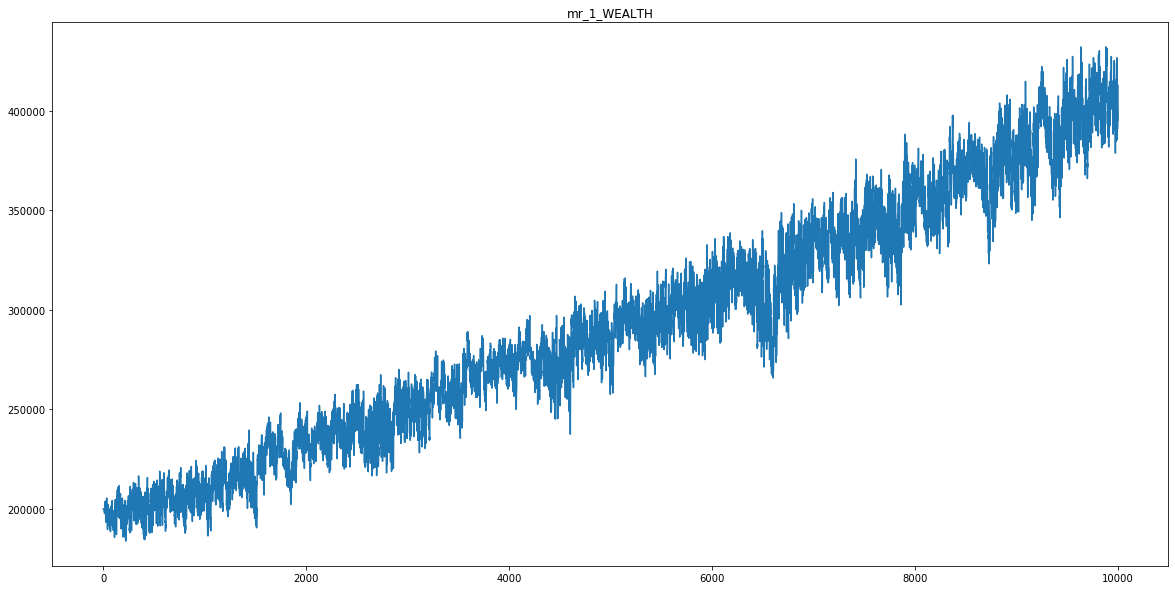

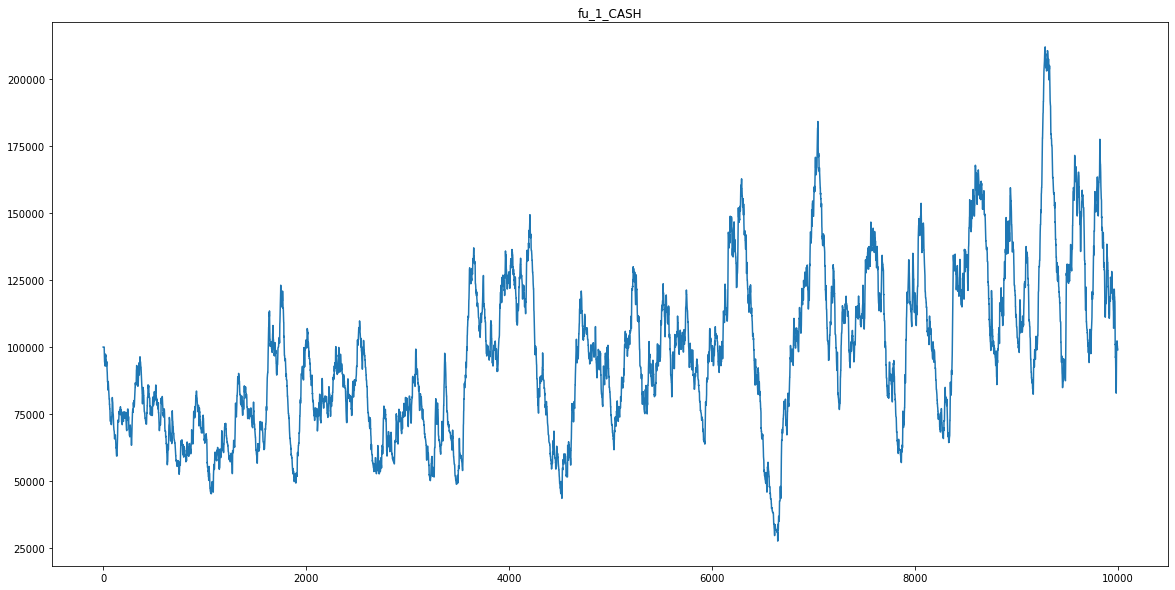

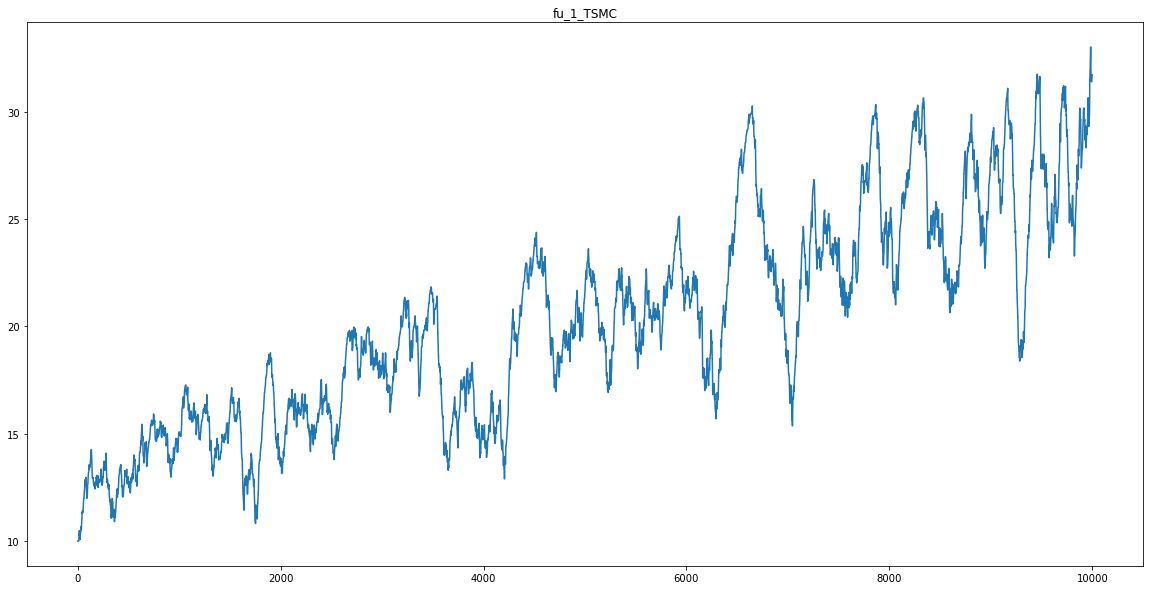

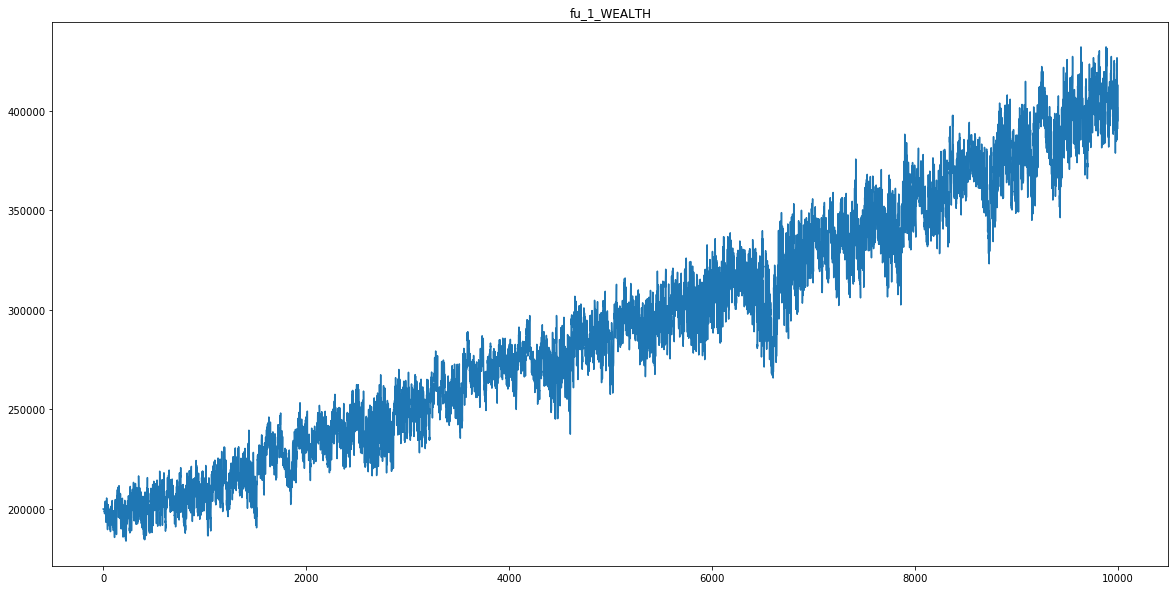

In [295]:
# for agent_type in agent.columns:
for i in range(len(agent.columns)):
    plt.figure(figsize=(20, 10))
    plt.plot(agent.iloc[:, i])
    plt.title(agent.columns[i])
    plt.show()